# Week 7 Exercises
Remember to look at all the exercises. There is plenty of coding to do here and particularly exercise 1 may take some time to run.
The exercisess 2-6 cover the basic neural net theory and should be prioritized, in particular be sure to take at look at exercise 3, 4 and 8.

## Ex 1: SVM Kernel fitting and cross validation

Using grid search cross validation and the SVM package find the best classifier svm classifier for the AU digits.
You can choose any kernel you want, but we suggest testing Gaussian and or Polynomial Kernels. Besides the hyperparameters for the choosen kernel you should also optimize for the regularization parameter $C$.

See here for help on SVM and Grid Search.
- [GridSearch](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
- [SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

**The task is**
- Implement a cross validation for svm with gaussian and/or polynomial kernel
- Find the best parameter settings for the kernels tested.
- Train on all data using the best parameters
- Test your final classifier on the test set. You should be able to get above 95 percent test accuracy.

**Hint: For saving time, subsampling the data set may help i.e. use only 2-3000 data points in the cross validation**

We have added a small script that visualizes the data.

You can use the same approach to visualize some support vectors if you like

shape of input data (10380, 784)
labels shape and type (10380,) int64
shape of input data (2580, 784)
labels shape and type (2580,) int64


NameError: name 'y_train' is not defined

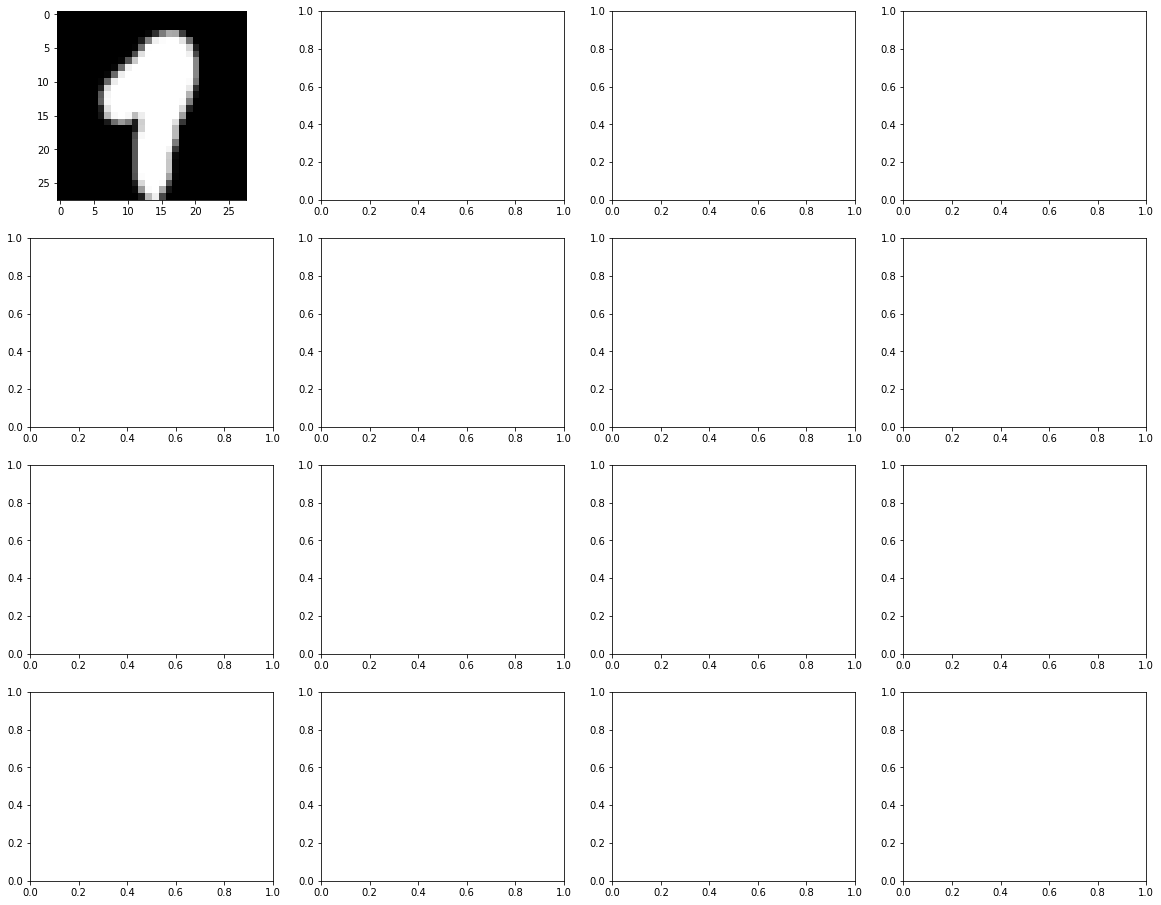

In [1]:
%matplotlib inline
import numpy as np
import os, urllib
import matplotlib.pyplot as plt
# load au digits
def load_digits_train_data():
    """ Load and return the training data """
    filename = 'auTrain.npz'
    if not os.path.exists(filename):
        print('file not exists - downloading')
        with open(filename, 'wb') as fh:
            path = "http://users-cs.au.dk/jallan/ml/data/{0}".format(filename)
            fh.write(urllib.request.urlopen(path).read())
    tmp = np.load('auTrain.npz')
    au_digits = tmp['digits']
    print('shape of input data', au_digits.shape)
    au_labels = np.squeeze(tmp['labels'])
    print('labels shape and type', au_labels.shape, au_labels.dtype)
    return au_digits, au_labels
½
def load_digits_test_data():
    """ Load and return the test data """
    filename = 'auTest.npz';
    if not os.path.exists(filename):
        print('file not exists - downloading')
        with open(filename, 'wb') as fh:
            path = "http://users-cs.au.dk/jallan/ml/data/{0}".format(filename)
            fh.write(urllib.request.urlopen(path).read())
    tmp = np.load('auTest.npz')
    au_digits = tmp['digits']
    print('shape of input data', au_digits.shape)
    au_labels = np.squeeze(tmp['labels'])
    print('labels shape and type', au_labels.shape, au_labels.dtype)
    return au_digits, au_labels

au_train_images, au_train_labels = load_digits_train_data()
au_test_images, au_test_labels = load_digits_test_data()

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
for i, ax in enumerate(axes.flat):
        ax.imshow(au_train_images[i, :].reshape(28, 28), cmap=plt.cm.gray)
        ax.set_title('image of a {0}'.format(y_train[i]))

plt.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm
### YOUR CODE HERE - run crossval here

### END CODE

In [4]:
print('Lets train on the best parameters found and test on the test data')
### YOUR CODE HERE
### END CODE

Lets train on the best parameters found and test on the test data


## Ex 2: Neural Network Design
In this exercise you must hand make neural networks that compute simple functions.
For the nonlinear transform you can mix them any way you like but you can only use, identity, sign, relu and sigmoid transforms in the neurons.
As a hint the only nonlinear transfrom the teacher uses is relu (and identity).
You can make the networks as wide and deep as you would like but small networks are sufficient.
* Make a network that computes c \cdot x for any constant c
* Make a network that computes xor of inputs $x_1$ and $x_2$. 
* Make a network that computes max($x_1$,$x_2$)
* Make a network that computes $x^2$ - for x in range {2,3,4,5} i.e. x is an integer


- **Hint 1: It is usually easier to find an easy mathematical expression that solves the problem and then to make a network that implements that**


## Ex 3: Neural Net Forward Pass - Mini Batch - Vectorized
Write a function that computes the forward pass of a (mini-)batch of inputs to a one hidden layer neural net with identity output neurons and relu nonlinearity $\textrm{relu}(x) = \max(0, x)$.

To be precise, write an algorithm that takes as input a batch of data and computes the output of the neural net on each input point given in the batch.

The data batch is given as an $n \times d$ matrix $X$, where each row is a data point (the input point as a column vector transposed if you follow the LFD books notation).

The hidden layer has size $h$, and the output layer has size 1 (for simplicity - easily generalizes).

This requires two sets of weights and biases
* The weights that map the input data to the input to hidden units. Call that H. The bias weights for this we name $b_1$.

* The weights that map the output of the hidden units to the output. Call that O. The bias weights for this we name $b_2$.

We organize the weighs in matrices $(W_1, W_2)$ and vectors $(b_1,b_2)$ as follows:
* The $i'th$ column of $W_1$ are the weights we multiply with the input data to get the input hidden node $i$. The size of $W_1$ is $d \times h$
* The bias $b_1$ is a vector of size h, the i'th entry the bias to hidden neuron $i$.
* The $i'th$ column of $W_2$ are the weights we multiply with the hidden layer activations to get the input to the i'th output node. $W_2$ is a $h \times \textrm{output_size}$ matrix
* The bias $b_2$ is a vector of size output_size 

**Task:** In the cell below (partially) complete the neural net class
- Implement the predict function of the neural net
- Implement the score function (least squares $\frac{1}{n} \sum_i (\textrm{nn}(x_i) - y_i)^2$

The actual error we get is random since we just set random weights.

**Hint**. What is the matrix product $X W_1$ where $X$ is the data matrix with the mini-batch if data where each input is a row and $W_1$ is the hidden layer weight matrix just defined.


In [3]:
%matplotlib inline
import numpy as np

class NN():
    
    def __init__(self, input_dim, hidden_size, output_size=1):
        self.W1 = np.random.rand(input_dim, hidden_size)
        self.b1 = np.random.rand(1, hidden_size)
        self.W2 = np.random.rand(hidden_size, output_size)
        self.b2 = np.random.rand(1, output_size)
        print('Neural net initialized with random values')
        
    def predict(self, X):    
        """ Evaluate the network on given data batch 
        
        Args:
        X: np.array shape (n, d)  Each row is a data point
        
        Output:
        pred: np.array shape (n, 1) output of network on each input point
        """
        # compute the following values
        pred = None # the output of neural net n x 1
    
        ### YOUR CODE HERE
        hidden_layer = X @ self.W1 + self.b1
        pred = hidden_layer @ self.W2 +self.b2
        ### END CODE
        return pred
    
    
    def score(self, X, y):
        """ Compute least squares loss (1/n sum (nn(xi) - y)^2)
        """
        loss = None
        ### YOUR CODE HERE
        loss = np.mean(np.sum(self.predict(X) - y)**2)
        ### END CODE
        return loss
        
# Change to reasonable data we can plot after training
# np.random.RandomState(42)
input_dim = 3
hidden_size = 8
X = np.random.rand(10, input_dim)
y = np.random.rand(10, 1)
my_net = NN(input_dim=input_dim, hidden_size=hidden_size)

nn_out = my_net.predict(X)
print('shape of nn_out', nn_out.shape) # should be n x 1
print('least squares error: ', my_net.score(X, y))


Neural net initialized with random values
shape of nn_out (10, 1)
least squares error:  2927.1236141219088


## Ex 4: Backpropagation

Consider the simple neural net 
$$
\textrm{nn}(x_1,x_2) = w_3 \cdot \textrm{relu}(w_1 \cdot x_1 + w_2 \cdot x_2)
$$
where $\textrm{relu}(x) = \max(x,0)$ and $w_1, w_2, w_3$ are the weights of the network

We only have one input point $x=(x_1,x_2) = (3.0, 1.0)$ with target value $y=9.0$

Consider the error 
$$
e=(y-\textrm{nn}(x))^2
$$
We need to minimize the error over $w_1, w_2, w_3$ and will do that using the gradients of $e$ relative to $w_1, w_2, w_3$.
Initialize $w_1=1,w_2=2, w_3=1$

Draw the computational graph for $e$ and run the forward pass to compute the error, and then run the backwards pass to compute the derivative of $w_1,w_2, w_3$ on the fixed input $x,y$

Write the python code that performs the forward and backwards pass below and evaluate the cost and the gradient
using notation similar to
http://cs231n.github.io/optimization-2/

Print intermediate steps in both the forward and the backward pass.

In [2]:
print('Do the python forward and backward pass here')
### YOUR CODE HERE

x1 = 3
x2 = 1
y = 9
w1 = 1 
w2 = 2 
w3 = 1

print("forward")
w1tx1 = w1*x1
print(f'w1*x1 = {w1tx1}')

w2tx2 = w2*x2
print(f'w2*x2 = {w2tx2}')

w1w2sum = w1tx1 + w2tx2
print(f'w1+w2 = {w1w2sum}')


relu = max(0, w1w2sum)
print(f'relu(w1*x1 + w2*x2)= {relu}')

w3trelu = w3 * relu
print(f'w3 * relu(w1*x1 + w2*x2)= {w3trelu}')

resminy = y-w3trelu
print(f'y - nn(x)= {resminy}')

powerresminy = resminy ** 2
print(f'\nerror.\ny -nn(x)²={powerresminy}') # MARTINS LØSNING ERROR ??

print("\nbackprop")
dpowresminy = 2 * resminy 
print(f'de/d(y-nn(x))={dpowresminy}')

dw3treul = -1 * dpowresminy # UNSURE IF -1
print(f'de/d(nn(x))={dw3treul}')

dw3 = relu * dw3treul
print(f'de/dw3={dw3}')

dreul = w3 * dw3treul
print(f'de/drelu={dreul}')

dw1w2sum = (1 if w1w2sum > 0 else 0)*dreul
print(f'de/dw1w2sum={dw1w2sum}')

dw1tx1 = 1 * dw1w2sum
print(f'de/dw1tx1={dw1tx1}')

dw2tx2 = 1 * dw1w2sum
print(f'de/dw2tx2={dw2tx2}')

dw1 = x1*dw1tx1
print(f'de/dw1={dw1}')

dw2 = x2 * dw2tx2
print(f'de/dw2={dw2}')




### END CODE



Do the python forward and backward pass here
forward
w1*x1 = 3
w2*x2 = 2
w1+w2 = 5
relu(w1*x1 + w2*x2)= 5
w3 * relu(w1*x1 + w2*x2)= 5
y - nn(x)= 4

error.
y -nn(x)²=16

backprop
de/d(y-nn(x))=8
de/d(nn(x))=-8
de/dw3=-40
de/drelu=-8
de/dw1w2sum=-8
de/dw1tx1=-8
de/dw2tx2=-8
de/dw1=-24
de/dw2=-8


## Ex 5: Automated Backpropagation using pytorch
In this exercise we will check our results from the previous exercise using pytorch.

For this we only need to code the forward pass and let automatic differentation take care of the rest!

**Task:** Write the forward pass in the cell below and use automatic differentation to test your answer from above.

Use x.retain_grad() to keep the gradient of any intermediate computation used in the forward pass to compare with above



tensor(-24.)
tensor(-8.)
tensor(-40.)
Lets show the computation graph


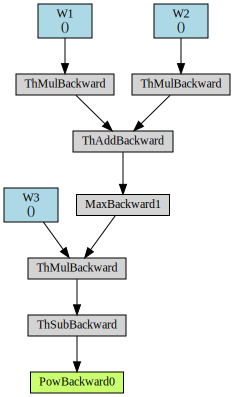

In [17]:
import torch
from torchviz import make_dot # install this package 

### YOUR CODE HERE 
x1 = torch.tensor(3.)
x2 = torch.tensor(1.)
y = torch.tensor(9.)
W1 = torch.tensor(1., requires_grad=True)
W2 = torch.tensor(2., requires_grad=True)
W3 = torch.tensor(1., requires_grad=True)

loss = (y - W3 * torch.max(x1*W1+x2*W2))**2
loss.backward()
print(W1.grad)
print(W2.grad)
print(W3.grad)

### END CODE
# print the graph - change naming appropriately
print('Lets show the computation graph')
make_dot(loss, params={'W1': W1, 'W2': W2, 'W3': W3})

## Ex. 6: Derivative/Jacobian of applying function elementwise to vector 
In this exercise we will consider the problem of computing the Jacobian/Gradient of mapping a vector of size $n$ to a vector of size $n$ by applying a function $f$ to each entry in the input.

Let $f$ be a smooth function from $\mathbb{R} \rightarrow \mathbb{R}$.

Let $F: \mathbb{R}^d \rightarrow \mathbb{R^d}$ defined as $F(v) = \left[f(v_1), \dots, f(v_d)\right]$

- Show that the Jacobian $J_F = D_f$, the $d \times d$ diagonal matrix where the $i$'th diagonal entry is $f'(v_i)$.
- If $f(x) = 1/(1+e^{-x})$ i.e. the logistic sigmoid function then how does the Diagonal matrix look
- If $f(x) = \max(0, x)$ i.e. relu how does the Diagonal Matrix look
- Consider a neural net backpropagation step and let hout be the output of applying F to the vector hin and assume we have computed the vector $\frac{\partial L}{\partial \textrm{hout}}$ ($1 \times h$)
    and wish to compute  $\frac{\partial L}{\partial \textrm{hin}}$ (also $1\times h)$. Write the pyhton code that acvieves that below
    

**hint:** There may be a more efficient way than actually creating the diagonal matrix and multiplying on the backpropagated derivative.

In [3]:
import numpy as np
d_hout = np.random.rand(1, 42)
def relu_grad(d_hout, hin):
    d_hin = None
    ### YOUR CODE HERE
    ### END CODE
    return d_hin

def sigmoid_grad(d_hout, hin):
    d_hin = None
    ### YOUR CODE HERE
    ### END CODE
    return d_hin



# Ex 7: Neural Nets by automatic differentation in pytorch
Before we introduce our selves to the idiomatic way of writing neural net code in pytorch we will implement a pair of basic basic neural nets and train it using just automatic differentation and the optim module introduced last week.

**The task is:**

Using pytorch implement Linear Regression with a weight decay (Ridge Regression) using Gradient Descent as Learning Algorithm and implement a one hidden layer neural net with relu activation for regression with Least Squares Cost and gradient descent learning algorithm.


1. Implement Linear Regression with Gradient Descent and test on the Boston data set for house prices (see cell below)
   Linear regression is simply a neural net with no hidden layer and one output neuron.
2. Implement  implement a standard one hidden layer neural net for regression. That means identity output activation and least squares error. For nonlineariry use relu. See cell two below

For both steps complete the following functions below in the respective cells for Linear Regression and Neural Nets
- cost - compute the least squares cost of the network on data and return the pytorch tensor of that
- fit - train 100 steps og gradient descent using optim package - find a good learning rate your self

We test your implementation on a standard regression data set for house prices and compare to the sklearn build in Ridge Regression. 
We only consider in sample error, which is of course not what we care about in the real world!.

Your Linear Regression implementation should get close to the sklearn Ridge Regression implementation that we have included

For the Neural Net you should do better (in sample)

In [20]:
import torch
from torch import optim
from sklearn.datasets import load_boston
from sklearn import linear_model

print('*'*5, 'Load and Prepare Data', '*'*5)
dataset = load_boston()
# print('dataset', dataset)
X, y = dataset.data, dataset.target
X = (X - X.mean(axis=0))/(X.std(axis=0))
#print('data stats', X.shape, X.mean(axis=0), X.std(axis=0))
ridge=linear_model.Ridge(alpha=0.1, fit_intercept=True)
ridge.fit(X, y)
# print(ridge.coef_, ridge.intercept_)
print('\n', '*'*5, 'Test Sklearn Ridge Regression for Comparison', '*'*5)
print('Ridge Regression Score:', ((ridge.predict(X)-y)**2).mean())

print('\n', '*'*5, 'Make data to torch tensors', '*'*5)
tX = torch.from_numpy(X).float()
ty = torch.from_numpy(y).float().view(-1, 1)


class LR():
    
    def __init__(self):
        pass
        
    def cost(self, X, y, w, b, c=0):
        """ Compute Regularized Least Squares Loss
        
          X: torch.tensor shape (n, d) - Data
          y: torch.tensor shape (n, 1) - Targets
          w: torch.tensor shape (n ,1) - weights
          b: torch.tensor shape (1 ,1) - bias weight
          c: ridge regression weight decay parameter (lambda)
          
          returns (regularized) cost tensor        
        """
        loss = None
        ### YOUR CODE HERE
        loss = ((y- (X @ w + b))**2 ).mean()
        reg_loss = w.sum()
        ### END CODE
        return loss + c * reg_loss
    
    def fit(self, X, y, c=0):
        """ GD Learning Algorithm for Ridge Regression with pytorch
        
        Args:
         X: torch.tensor shape (n, d)
         y: torch.tensor shape (n, 1)
         c: ridge regression weight decay parameter (lambda)
        """
        w = torch.zeros(X.shape[1], 1, requires_grad=True)
        b = torch.zeros(1, 1, requires_grad=True)
        ### YOUR CODE HERE use optim.SGD, remember to call zero_grad before each iteration to clear accumulated gradients
        optimizer = optim.SGD([w,b],lr=0.1)
        for i in range(20):
            loss = self.cost(X,y,w,b,c)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        ### END CODE
        self.w = w.clone()
        self.b = b.clone()


    def score(self, X, y):
        """ Compute least squares cost for model 
        
        Args:
         X: torch.tensor shape (n, d)
         y: torch.tensor shape (n, 1)
         
        returns least squares score of model on data X with targets y
        """
        score = None
        ### YOUR CODE HERE
        score = ((y-(X@self.w+self.b))**2).mean()
        ### END CODE
        return score

print('\n', '*'*5, 'Run Torch Linear Regression Gradient Descent', '*'*5)

tlr = LR()
tlr.fit(tX, ty, 0.1)
print('pytorch Linear Regression Regression least squares score:', tlr.score(tX, ty).item())

***** Load and Prepare Data *****

 ***** Test Sklearn Ridge Regression for Comparison *****
Ridge Regression Score: 21.897789962737757

 ***** Make data to torch tensors *****

 ***** Run Torch Linear Regression Gradient Descent *****
pytorch Linear Regression Regression least squares score: 22.851293563842773


In [36]:
class NN():
    
    def __init__(self):
        pass

    def cost(self, X, y, W1, b1, W2, b2, c=0):
        """ Compute (Regularized) Least Squares Loss of neural net
        
          X: torch.tensor shape (n, d) - Data
          y: torch.tensor shape (n, 1) - Targets
          W1: torch.tensor shape (d, h) - weights
          b1: torch.tensor shape (1, 1) - bias weight
          W2: torch.tensor shape (d, 1) - weights
          b2: torch.tensor shape (1, 1) - bias weight
          c: ridge regression weight decay parameter (lambda)
    
        returns (regularized) cost tensor
        """
   
        loss = None
        ### YOUR CODE HERE
        loss = ((y- (X @W1 + b1).clamp(min=0)@ W2 + b2)**2).mean()+ c * ((W1**2).sum() + ((W2**2)).sum())
        ### END CODE
        return loss
    
    def fit(self, X, y, hidden_size=32, c=0.01):   
        """ GD Learning Algorithm for Ridge Regression with pytorch
        
         Args:
         X: torch.tensor shape (n, d)
         y: torch.tensor shape (n, 1)
         hidden_size: int 
         c: float weight decay parameter (lambda)
        """
        input_dim = X.shape[1]        
        W1 = torch.randn(input_dim, hidden_size, requires_grad=True)
        b1 = torch.randn(1, hidden_size, requires_grad=True)
        W2 = torch.randn(hidden_size, 1, requires_grad=True)
        b2 = torch.randn(1, 1, requires_grad=True)
        ### YOUR CODE HERE
        optimizer = optim.SGD([W1,b1,W2,b2],lr=0.01)
        for i in range(70):
            loss = self.cost(X,y,W1,b1,W2,b2,c)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        ### END CODE
        self.W1 = W1
        self.W2 = W2
        self.b1 = b1
        self.b2 = b2
        
    def score(self, X, y):
        """ Compute least squares cost for model 
        
        Args:
         X: torch.tensor shape (n, d)
         y: torch.tensor shape (n, 1)
         
        returns least squares score of model on data X with targets y
        """
        score = None
        ### YOUR CODE HERE
        score = ((y-((X @self.W1 + self.b1).clamp(min=0)@self.W2+self.b2))**2).mean()
        ### END CODE
        return score


net = NN()
net.fit(tX, ty, hidden_size=16, c=0.01)
print('pytorch Neural Net Regression least squares score:', net.score(tX, ty).item())

pytorch Neural Net Regression least squares score: 27.44835090637207


# Ex: 8 Vectorized Backpropagation (may be  hard)
In this exercise you are to compute the derivative of a loss function using vectorized derivatives.

Define (data) matrices
$$
X = \begin{bmatrix}
    x_1= [1., 1.]^\intercal \\
    x_2= [-1., 5.]^\intercal \\
    x_3 = [-1., -1.]]^\intercal
    \end{bmatrix} 
    ,\quad
 y = [1., 1., 1.]^\intercal 
$$
where $X$ is a $3 \times 2$ matrix and $y$ a $3 \times 1$ matrix.

Furthermore define
$$
W = [2., 3.]^\intercal, \quad
b = [-2] 
$$
where $W$ is a matrix of shape $2 \times 1$.
and $b$ is a $1 \times 1$ matrix (or scalar)


Now define our simple neural net
$$ 
\textrm{nn}(x) = \textrm{relu}(X W) + b
$$
and let 
$$
L(X, y) = - \sum_{i=1}^3(y_i \lg \sigma(\textrm{nn}(x_i)) + (1-y)\lg(1-\sigma(\textrm{nn}(x_i)))
$$
denote the cross entropy loss. Notice that the loss applies the sigmoid function $\sigma(x) = \frac{1}{1+e^{-x}}$.



Compute the derivative of the loss L in regards to every input value in $X$ $\frac{\partial \textrm{loss} }{\partial X}$ at input point $X$.
That means you must derive
$$
\frac{\partial L}{\partial X_{i, j}}(X)
$$
for all $i, j$.

Write out the formulas to compute these derivatives using backpropagation and try to write them in vectoried notation. 
That means you need derivatives of all the steps on the way.

Test your formulas by using pytorch below.



**Hints:**
- Notice that $y$ is always 1 - which means for simplicity we can ignore the symmetric case when y = 0 in all computations 
- Compute/Define store hin as input to relu and hout as output of relu (the output of the net) compute derivative of loss relative to hin and hout in backprop
- As first step compute $d_{L, \textrm{nn}(x)} = \frac{\partial L}{\partial \textrm{hout}}(x)$ (a $1 \times 3$ vector) (for simplicity remeber that y is always 1 in our case)
- Use Rule Above for Relu to compute vector of derivatives of L relative to hin (input to relu) 
- Use the matrix product rule from http://cs231n.github.io/optimization-2/ (the very end) to go from the derivative relative to hin to derivative relative to X 



In [37]:
import torch
import torch.nn.functional as F
from torchviz import make_dot

X = torch.tensor([[1., 1.], [-1., 5.], [-1., -1.]], requires_grad=True)
y = torch.tensor([[1.],
                  [1.],
                  [1.]], requires_grad=True)
W = torch.tensor([[2.], [3.]])
b = torch.tensor([[-2.]])
print('shapes X, y, W, b', X.shape, y.shape, W.shape, b.shape)
### YOUR CODE HERE
### END CODE
# rename if your loss is not named loss
make_dot(loss, params={'X': X, 'y': y})

shapes X, y, W, b torch.Size([3, 2]) torch.Size([3, 1]) torch.Size([2, 1]) torch.Size([1, 1])


KeyError: 140449164130488